In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\kusal\OneDrive\Desktop\dwdm\dataset_traffic_accident_prediction1.csv")

# Drop rows with missing values
df_clean = df.dropna()


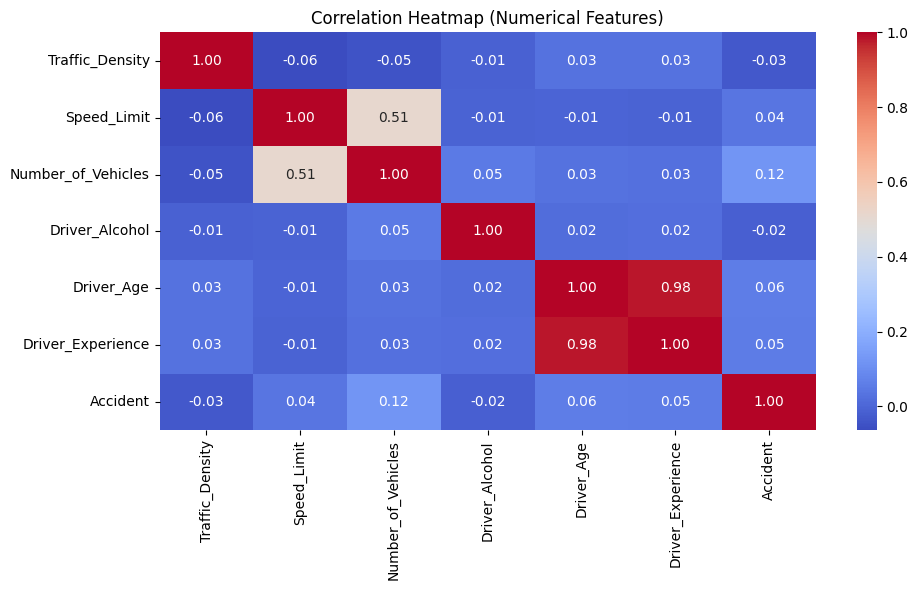

In [3]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
corr = df_clean.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

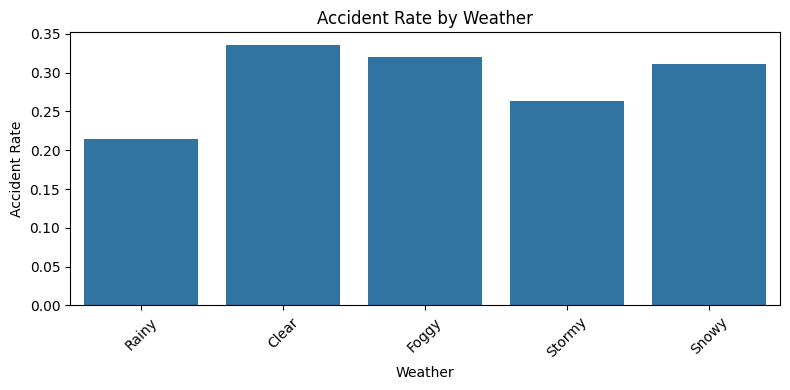

In [20]:
# WEATHER vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Weather", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x),errorbar=None)
plt.title("Accident Rate by Weather")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


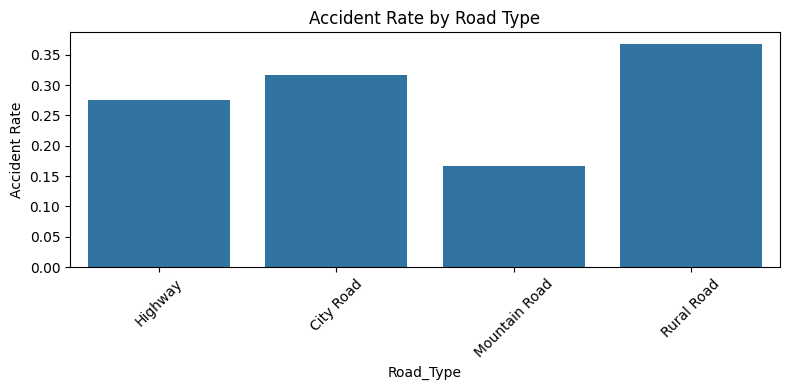

In [5]:
# ROAD TYPE vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Road_Type", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Accident Rate by Road Type")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


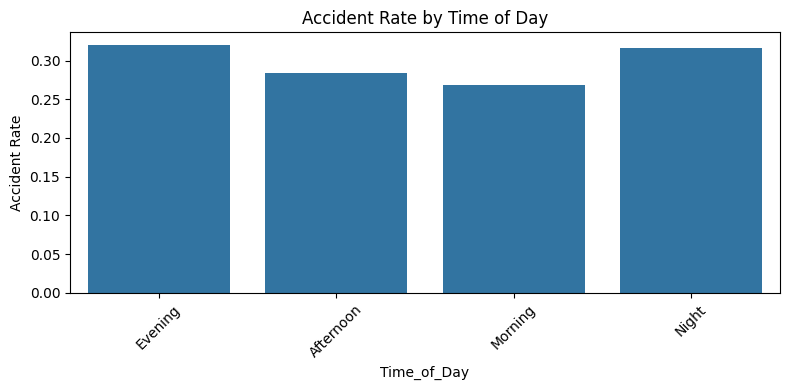

In [6]:
# TIME OF DAY vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Time_of_Day", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Accident Rate by Time of Day")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


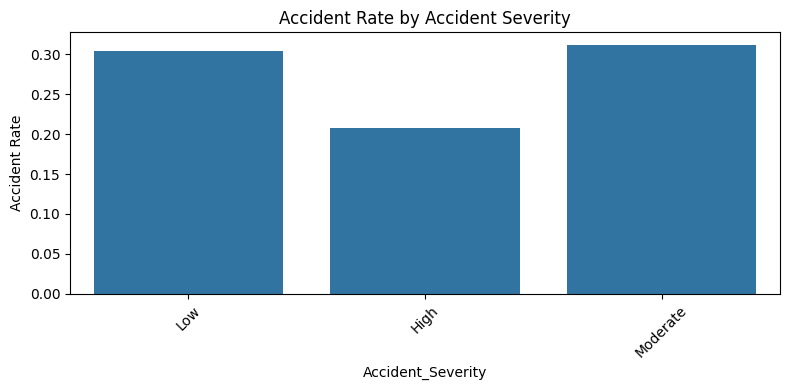

In [7]:
# ACCIDENT SEVERITY vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Accident_Severity", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Accident Rate by Accident Severity")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


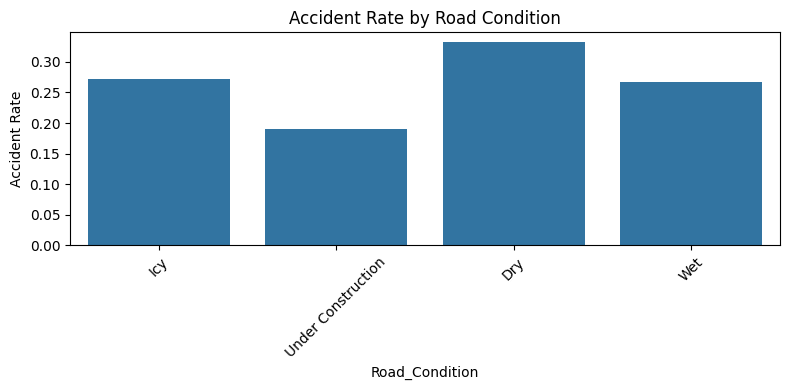

In [8]:
# ROAD CONDITION vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Road_Condition", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Accident Rate by Road Condition")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


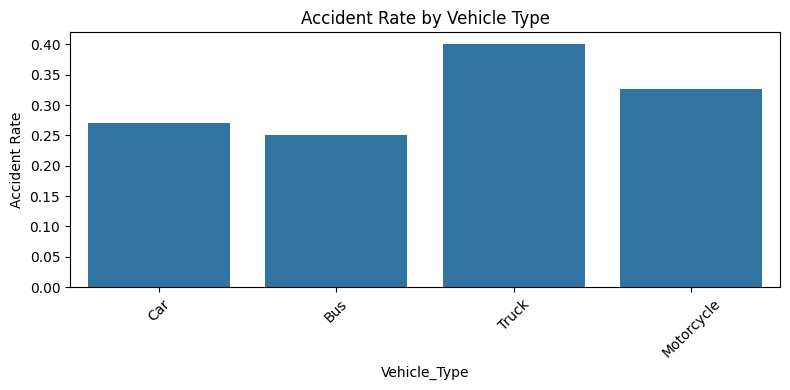

In [21]:
# VEHICLE TYPE vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Vehicle_Type", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Accident Rate by Vehicle Type")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


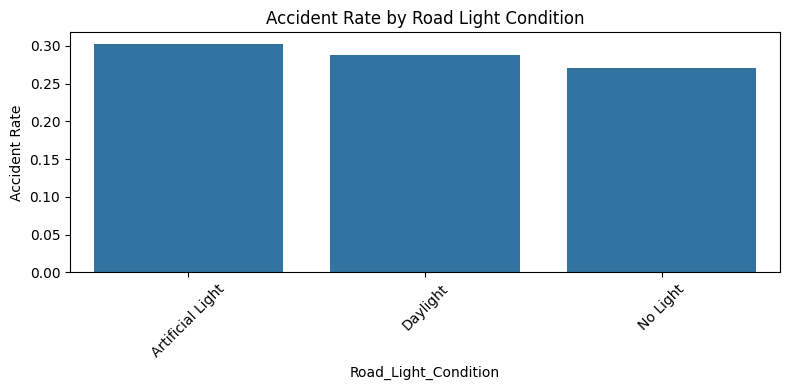

In [22]:
# ROAD LIGHT CONDITION vs ACCIDENT RATE
plt.figure(figsize=(8, 4))
sns.barplot(x="Road_Light_Condition", y="Accident", data=df_clean, estimator=lambda x: sum(x)/len(x), errorbar=None)
plt.title("Accident Rate by Road Light Condition")
plt.xticks(rotation=45)
plt.ylabel("Accident Rate")
plt.tight_layout()
plt.show()


In [11]:
# Encode categorical features
df_encoded = df_clean.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [24]:
# Define features and target
X = df_encoded.drop(columns=['Accident'])
y = df_encoded['Accident']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [14]:

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [15]:
# Evaluate models
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_preds))
print("\n=== Logistic Regression Classification Report ===")
print(classification_report(y_test, lr_preds))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84        57
         1.0       0.80      0.17      0.28        24

    accuracy                           0.74        81
   macro avg       0.77      0.57      0.56        81
weighted avg       0.76      0.74      0.67        81


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81        57
         1.0       0.40      0.08      0.14        24

    accuracy                           0.69        81
   macro avg       0.56      0.52      0.47        81
weighted avg       0.62      0.69      0.61        81



In [16]:
# Feature importance plot from Random Forest
importances = rf.feature_importances_
feat_names = X.columns

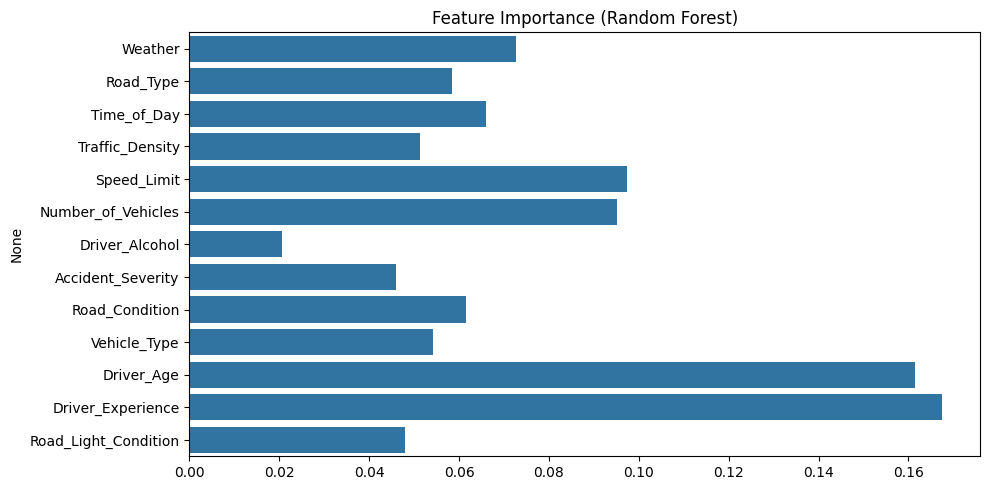

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()



=== Random Forest ===
Accuracy: 0.74
Precision: 0.80
Recall: 0.17
F1 Score: 0.28


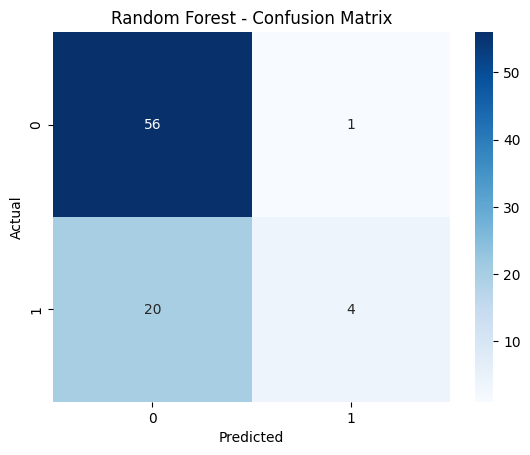


=== Logistic Regression ===
Accuracy: 0.69
Precision: 0.40
Recall: 0.08
F1 Score: 0.14


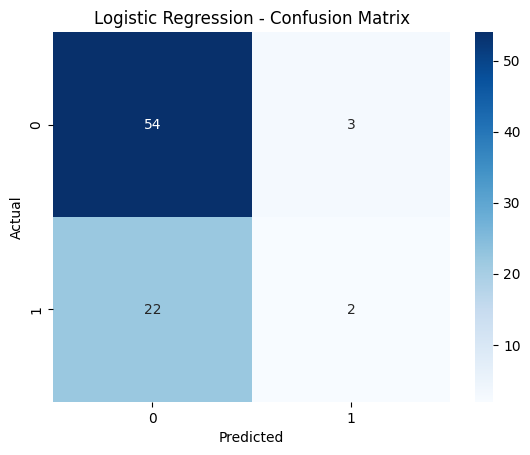

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions (already trained rf and lr models)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


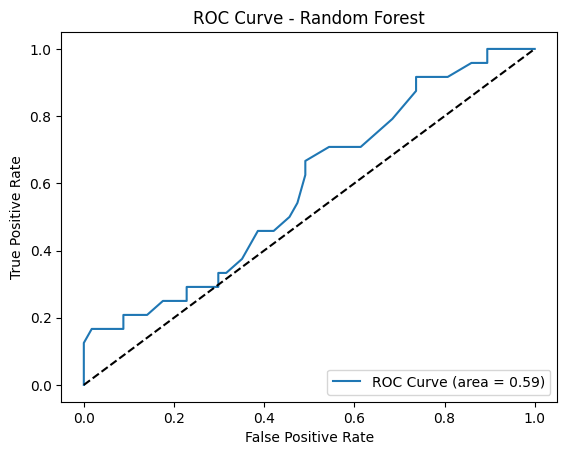

In [19]:
# ROC Curve for Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()
